**Advanced Machine Learning (Semester 1 2023)**
# 4 Training and Tuning of Neural Networks


*N. Hernitschek, 2023*


This Jupyter notebook allows us to take a more detailed look at gradient descent algorithms. In addition, we see an intro to professional neural network packages.



---
## Contents
* [Gradient Descent with Momentum](#first-bullet)
* [Software Frameworks](#second-bullet)
* [Preparation for next time](#third-bullet)
* [Summary](#fourth-bullet)

## 1. Gradient Descent with Momentum <a class="anchor" id="first-bullet"></a>

In this section, we will first implement the gradient descent optimization algorithm, then update it to include the concept of momentum and compare results.

We start by defining an optimization function for an **One-Dimensional Test Problem**.

The `objective()` function below implements this function.

In [1]:
# objective function
def objective(x):
 return x**2.0

We can then compute the objective function in the range $[-1,1]$ and plot it to get an intuition for the shape of the function we will optimize:


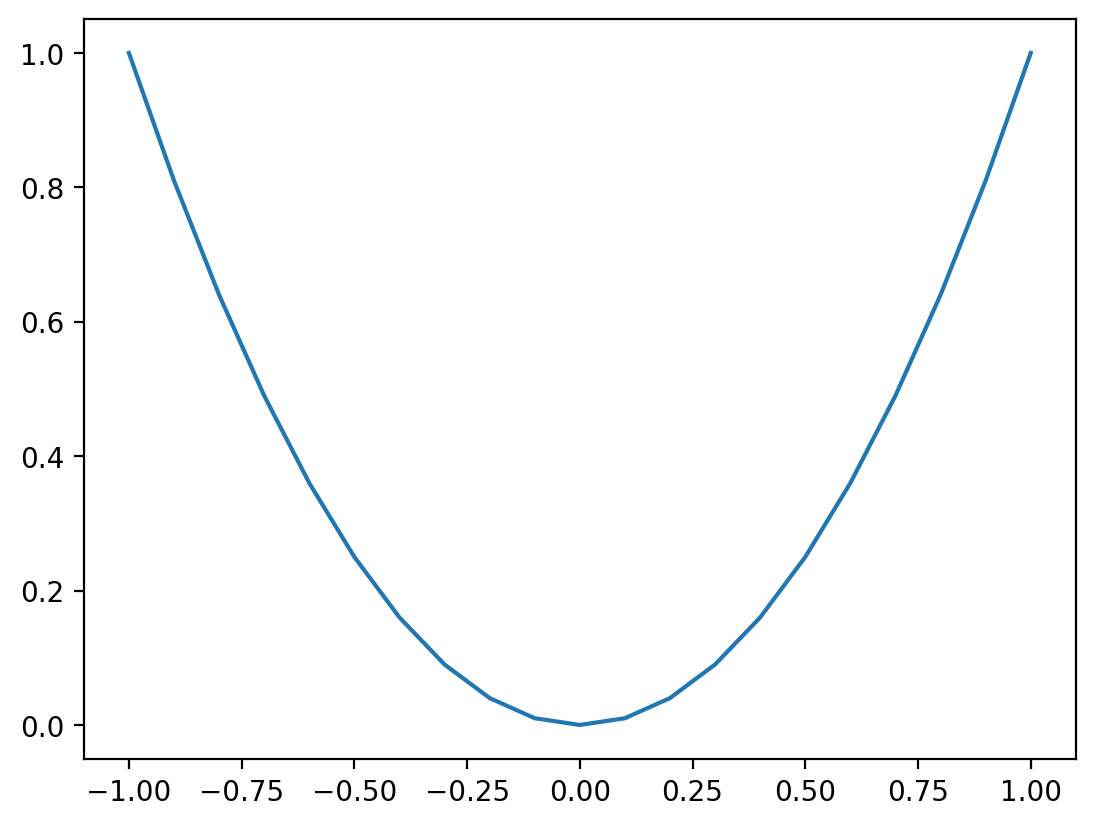

In [2]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = np.arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)


# create a line plot of input vs result
plt.plot(inputs, results)
plt.show()

### Gradient Descent Optimization

We continue with applying the gradient descent algorithm to this function.

For this, we first need a function `derivative()` that calculates the derivative of the objective function.


In [3]:
# derivative of objective function
def derivative(x):
 return x * 2.0

In the following we implement the gradient descent optimization algorithm.

The procedure involves starting with a **randomly selected point** in the search space, then calculating the gradient, updating the position in the search space, evaluating the new position, and reporting the progress. This process is repeated for a fixed number of iterations, after which the final point is returned from the function.

The implementation takes place in the function `gradient_descent()` which takes the objetive function, its derivative (gradient), the boundaries of the input, the number of iterations and the step size. 

In [4]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
 # generate an initial point
 solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # run the gradient descent
 for i in range(n_iter):
 # calculate gradient
   gradient = derivative(solution)
   # take a step
   solution = solution - step_size * gradient
   # evaluate candidate point
   solution_eval = objective(solution)
   # report progress
   print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
 return [solution, solution_eval]

We can then define the bounds of the objective function, the step size, and the number of iterations for the algorithm. We use here a step size of 0.1 and 30 iterations.

Here for testing, the seed for the pseudorandom number generator is fixed so that we always get the same sequence of random numbers.

In [5]:
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

# seed the pseudo random number generator
seed(5)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the maximum step size
step_size = 0.1
# perform the gradient descent search
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)

>0 f([-0.44481093]) = 0.19786
>1 f([-0.35584874]) = 0.12663
>2 f([-0.28467899]) = 0.08104
>3 f([-0.22774319]) = 0.05187
>4 f([-0.18219456]) = 0.03319
>5 f([-0.14575564]) = 0.02124
>6 f([-0.11660452]) = 0.01360
>7 f([-0.09328361]) = 0.00870
>8 f([-0.07462689]) = 0.00557
>9 f([-0.05970151]) = 0.00356
>10 f([-0.04776121]) = 0.00228
>11 f([-0.03820897]) = 0.00146
>12 f([-0.03056717]) = 0.00093
>13 f([-0.02445374]) = 0.00060
>14 f([-0.01956299]) = 0.00038
>15 f([-0.01565039]) = 0.00024
>16 f([-0.01252031]) = 0.00016
>17 f([-0.01001625]) = 0.00010
>18 f([-0.008013]) = 0.00006
>19 f([-0.0064104]) = 0.00004
>20 f([-0.00512832]) = 0.00003
>21 f([-0.00410266]) = 0.00002
>22 f([-0.00328213]) = 0.00001
>23 f([-0.0026257]) = 0.00001
>24 f([-0.00210056]) = 0.00000
>25 f([-0.00168045]) = 0.00000
>26 f([-0.00134436]) = 0.00000
>27 f([-0.00107549]) = 0.00000
>28 f([-0.00086039]) = 0.00000
>29 f([-0.00068831]) = 0.00000


The following gives the **complete example of applying gradient descent** to our one-dimensional test function, including plotting:

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


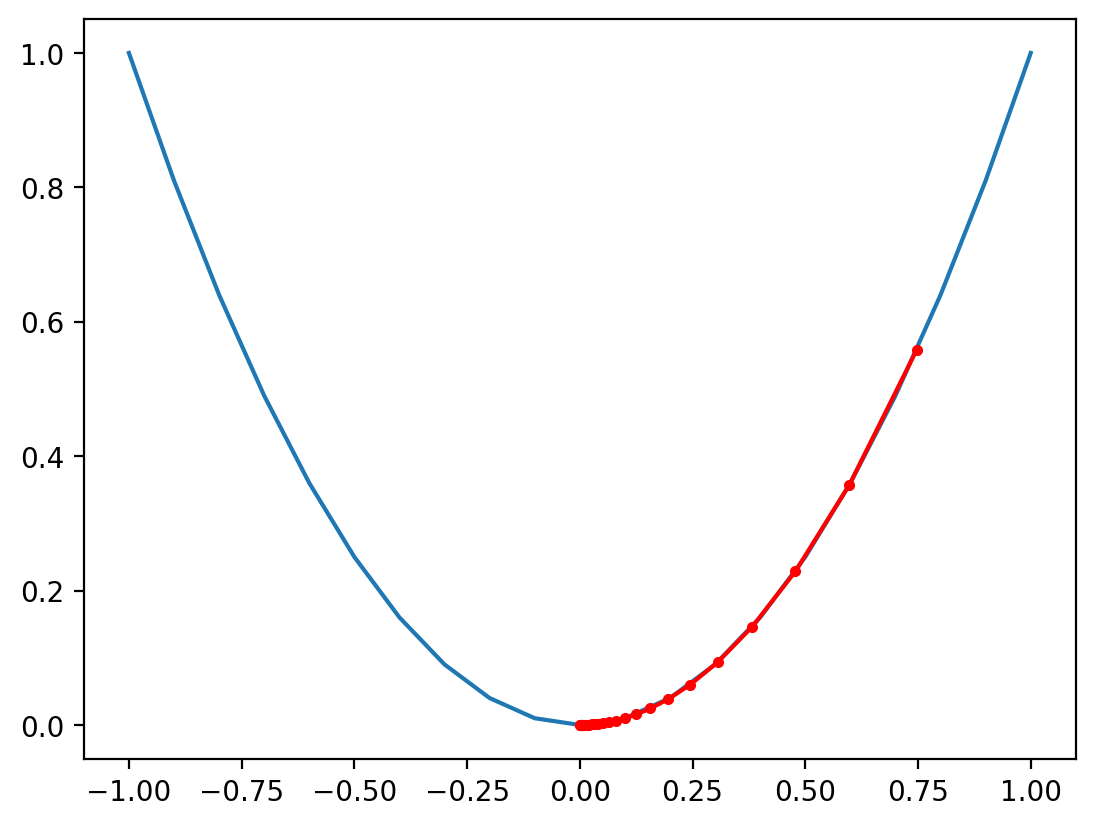

In [6]:
# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
 return x**2.0
 
# derivative of objective function
def derivative(x):
 return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
 # track all solutions
 solutions, scores = list(), list()
 # generate an initial point
 solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # run the gradient descent
 for i in range(n_iter):
   # calculate gradient
   gradient = derivative(solution)
   # take a step
   solution = solution - step_size * gradient
   # evaluate candidate point
   solution_eval = objective(solution)
   # store solution
   solutions.append(solution)
   scores.append(solution_eval)
   # report progress
   print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
 return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

From the plot we can see that the search started more than halfway up the right part of the function and stepped downhill to the bottom of the basin. (Due to the stochastic nature, your result may vary but the overall impression should be the same.)

We observe that where the gradient is larger, large steps are taken. Similarly, when the gradient decreases and the function is getting closer to the minimum, smaller steps are taken. Thus the step size reflects the magnitude of the gradient (curvature) of the objective function.

### Gradient Descent Optimization With Momentum

In the following, we modify the gradient descent by introducting momentum.
This is done by modifying the `gradient_descent()` function so it takes a `momentum` argument.
Also, the change made to the solution must be saved from the previous iteration, starting with n initial value of 0.0.

In [7]:
# keep track of the change
change = 0.0

We then break down the update procedure into 1. calculating the gradient, 2. calculating the change to the solution, 3. calculating the position of the new solution, 4. saving the change for the next iteration.

In [8]:
### caution - this code alone won't run


# calculate gradient
gradient = derivative(solution)
# calculate update
new_change = step_size * gradient + momentum * change
# take a step
solution = solution - new_change
# save the change
change = new_change

NameError: name 'solution' is not defined

The updated version of the `gradient_descent()` function with these changes is given below.

In [9]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
 # generate an initial point
 solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # keep track of the change
 change = 0.0
 # run the gradient descent
 for i in range(n_iter):
 # calculate gradient
   gradient = derivative(solution)
   # calculate update
   new_change = step_size * gradient + momentum * change
   # take a step
   solution = solution - new_change
   # save the change
   change = new_change
   # evaluate candidate point
   solution_eval = objective(solution)
   # report progress
   print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
 return [solution, solution_eval]

We can then choose a momentum value and pass it to the `gradient_descent()` function.

With some trial and error, we use find a momentum value of 0.3 to be effective on this problem.

In [10]:
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)

>0 f([0.0755716]) = 0.00571
>1 f([0.05478941]) = 0.00300
>2 f([0.03759687]) = 0.00141
>3 f([0.02491973]) = 0.00062
>4 f([0.01613265]) = 0.00026
>5 f([0.01026999]) = 0.00011
>6 f([0.0064572]) = 0.00004
>7 f([0.00402192]) = 0.00002
>8 f([0.00248695]) = 0.00001
>9 f([0.00152907]) = 0.00000
>10 f([0.00093589]) = 0.00000
>11 f([0.00057076]) = 0.00000
>12 f([0.00034707]) = 0.00000
>13 f([0.00021055]) = 0.00000
>14 f([0.00012748]) = 0.00000
>15 f([7.7065592e-05]) = 0.00000
>16 f([4.65276379e-05]) = 0.00000
>17 f([2.80607242e-05]) = 0.00000
>18 f([1.69085052e-05]) = 0.00000
>19 f([1.01811385e-05]) = 0.00000
>20 f([6.12670075e-06]) = 0.00000
>21 f([3.68502928e-06]) = 0.00000
>22 f([2.21552199e-06]) = 0.00000
>23 f([1.3315654e-06]) = 0.00000
>24 f([8.00065346e-07]) = 0.00000
>25 f([4.8060226e-07]) = 0.00000
>26 f([2.88642882e-07]) = 0.00000
>27 f([1.73326492e-07]) = 0.00000
>28 f([1.04066277e-07]) = 0.00000
>29 f([6.24749569e-08]) = 0.00000


The following gives the **complete example of applying gradient descent with momentum** to our one-dimensional test function, including plotting:

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


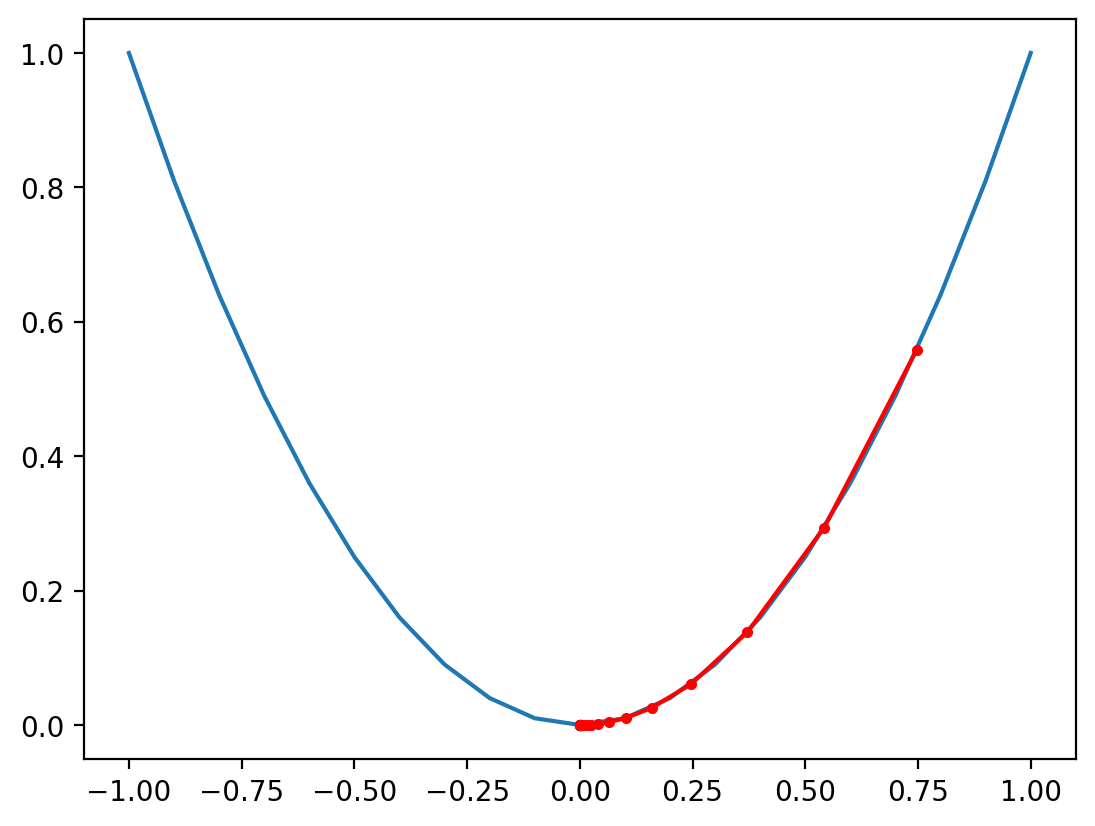

In [11]:

# example of plotting gradient descent with momentum for a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
 return x**2.0
 
# derivative of objective function
def derivative(x):
 return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
 # track all solutions
 solutions, scores = list(), list()
 # generate an initial point
 solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # keep track of the change
 change = 0.0
 # run the gradient descent
 for i in range(n_iter):
   # calculate gradient
   gradient = derivative(solution)
   # calculate update
   new_change = step_size * gradient + momentum * change
   # take a step
   solution = solution - new_change
   # save the change
   change = new_change
   # evaluate candidate point
   solution_eval = objective(solution)
   # store solution
   solutions.append(solution)
   scores.append(solution_eval)
   # report progress
   print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
 return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()


Running the example starts with a random point in the search space, then applies the gradient descent algorithm with momentum, reporting performance along the way.

Here we can see that the algorithm finds a good solution after about ~13 iterations, with a function evaluation of about 0.0.

As expected, this is **faster (fewer iterations) than gradient descent without momentum**, as using the same starting point and step size that took 27 iterations.


You can try different values for momentum and review the resulting plot.


## 2. Software Frameworks <a class="anchor" id="third-bullet"></a>

What we have done so far are "toy examples" to get a better understanding of how neural network algorithms work. For real application, we will use software frameworks such as TensorFlow, astroNN or PyTorch.

For your project as part of this course, you can use whichever framework you want to use.
We will see here some short examples for TensorFlow and astroNN.

### TensorFlow

https://www.tensorflow.org/



TensorFlow is tested and supported on the following 64-bit systems:

*    Python 3.7–3.10
*    Ubuntu 16.04 or later
*    Windows 7 or later (with C++ redistributable)
*    macOS 10.12.6 (Sierra) or later (no GPU support)
*    WSL2 via Windows 10 19044 or higher including GPUs (Experimental)


The installation guide can be found here:
https://www.tensorflow.org/install


TensorFlow can also be used on Google Colab (for testing purposes):
Run the TensorFlow tutorials directly, without any installation, in the browser with Colaboratory, a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.

https://www.tensorflow.org/tutorials

The TensorFlow tutorials are written as Jupyter notebooks and run directly in Google Colab. Just click the Run in Google Colab button. 


https://www.tensorflow.org/tutorials/quickstart/beginner

We're going through this example in Google Colab:
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=7FP5258xjs-v
    
It uses the MNIST database of hand-written digits. 
In Google Colab, you can modify the code!

Here is a snipplet out of the above tutorial:

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


this code builds a neural network with the following layers:
    
`Flatten`, `Dense`, `Dropout`, `Dense`


Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.
    
    

    
    
`Flatten`: used to flatten the input


`Dense`: a regular densely-connected NN layer
The numeric parameter is the dimensionality of the output space.
The standard activation of the `Dense` layer is None (ie. "linear" activation: $a(x) = x$). 


`Dropout`: a lyer with dropout
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by `1/(1 - rate)` such that the sum over all inputs is unchanged.
Note that the Dropout layer only applies when `training` is set to `True` such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.
    
    

### astroNN

https://astronn.readthedocs.io/en/latest/
    
    
astroNN is a Python package for neural networks with targeted application in astronomy by using Keras API as model and training prototyping, but at the same time take advantage of Tensorflow’s flexibility.

For non-astronomy applications, astroNN contains custom loss functions and layers which are compatible with Tensorflow. The custom loss functions mostly designed to deal with incomplete labels. astroNN contains demo for implementing Bayesian Neural Net with Dropout Variational Inference in which you can get reasonable uncertainty estimation and other neural nets.

For astronomy applications, astroNN contains some tools to deal with APOGEE, Gaia and LAMOST data. astroNN is mainly designed to apply neural nets on APOGEE spectra analysis and predicting luminosity from spectra using data from Gaia parallax with reasonable uncertainty from Bayesian Neural Net. Generally, astroNN can handle 2D and 2D colored images too. Currently astroNN is a python package being developed by the main author to facilitate his research project on deep learning application in stellar and galactic astronomy using SDSS APOGEE, Gaia and LAMOST data.

For learning purpose, astroNN includes a deep learning toy dataset for astronomer - Galaxy10 DECals Dataset.


It is currently somewhat outdated and not compatible with current TensorFlow versions so I currently cannot recommend using it as a neural network package. However, the data sets might be useful for testing purposes.

## 3. Preparation for next time <a class="anchor" id="third-bullet"></a>

We have discussed the astronomy paper(s) you selected. For next session (May 15), prepare a 15-minute presentation and highlight especially the machine-learning/ neural network content of that paper.


## 4. Summary <a class="anchor" id="fourth-bullet"></a>

At this point, all of you should have:
* seen what the benefits of more advanced gradient descent algorithms are
* used a professional neural network package.



